## Intro to Keras

Keras is a deep-learning framework for Python that provides a convenient way to define and
train almost any kind of deep-learning model. Keras was initially developed for
researchers, with the aim of enabling fast experimentation.

Keras has the following key features:
* It allows the same code to run seamlessly on CPU or GPU.
* It has a user-friendly API that makes it easy to quickly prototype deep-learning models.
* It has built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both.
* It supports arbitrary network architectures: multi-input or multi-output models, layer sharing, model sharing, and so on. This means.

Keras is appropriate for building essentially any deep-learning model, from a generative adversarial network
to a neural Turing machine.

Keras has well over 200,000 users, ranging from academic researchers and engineers
at both startups and large companies to graduate students and hobbyists. Keras
is used at Google, Netflix, Uber, CERN, Yelp, Square, and hundreds of startups working
on a wide range of problems. Keras is also a popular framework on Kaggle, the
machine-learning competition website, where almost every recent deep-learning competition
has been won using Keras models.


Keras handles the problem of building neural networks in a modular way  thus several different backend engines can
be plugged seamlessly into Keras. Currently, the three existing backend implementations
are:
* TensorFlow
* Theano 
* Microsoft Cognitive Toolkit (CNTK) backend.

### Multi-backend Keras and tf.keras:
* For Keras with the TensorFlow backend use tf.keras in TensorFlow 2.0 instead of keras library
* tf.keras is better maintained and has better integration with TensorFlow features 
* The latest release of Keras 2.3.0 makes significant API changes and add support for TensorFlow 2.0.
* 2.3.0 is the last major release of multi-backend Keras
* saving a model's weights, tf.keras defaults to the checkpoint format. Pass save_format='h5' to use HDF5 (or pass a filename that ends in .h5).

### Why Keras?
* With TensorFlow 2.0, the Keras API can accomplish many of these same tasks as high level API - Estimators
* Keras is believed to be an easier API to learn
* User friendly - offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.
* Modular - A model is understood as a sequence or a graph of standalone, fully configurable modules that can be plugged together with as few restrictions as possible. 
* Easily extensibile - New modules are simple to add as new classes and functions, 
* Fast integration - started as separated project, fully integrated in Tensorflow 2.0 

####  Keras workflow

1. Define and preprocess training data: input tensors and target tensors.
2. Define input layers/model that maps your inputs to your targets
3. Setup loss function, an optimizer, and some metrics to monitor appropriate to the problem
4. Iterate on your training data by calling the fit() method of your model.

#### 1. Define and preprocess data
* Input tensors
* Label/target tensors

#### DiamondsDatset
* price in US dollars (\\$326--\$18,823)

* carat weight of the diamond (0.2--5.01)

* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color diamond colour, from J (worst) to D (best)

* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table width of top of diamond relative to widest point (43--95)

In [5]:
import tensorflow as tf
tf.test.is_gpu_available()
tf.test.is_built_with_cuda()
tf.config.list_physical_devices()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
pwd

'C:\\Users\\paperspace\\Desktop\\training\\Training materials I\\2. Budowa sieci MLP w Tensorflow Keras API'

In [7]:
import pandas as pd
import numpy as np
df=pd.read_csv("../../../data/data/diamonds.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
df.drop(columns='Unnamed: 0', inplace=True)

In [10]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [11]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [12]:
pd.get_dummies(df.cut)

,Fair,Good,Ideal,Premium,Very Good
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
53935,0,0,1,0,0
53936,0,1,0,0,0
53937,0,0,0,0,1
53938,0,0,0,1,0


#### train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df.drop(columns='price')
y=df['price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37758, 9), (16182, 9), (37758,), (16182,))

In [17]:
# %load "g:/My Drive/diamonds_preproc.py"
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. select labels of features for one hot encoding and standarization
num_labels = X_train.select_dtypes("number").columns
cat_labels = X_train.select_dtypes("object").columns

# 2. define preprocessor for each type of data
cat_preprocessor = OneHotEncoder(drop = "if_binary")
num_preprocessor = RobustScaler()

# 3. Combine it all together
preprocessor = ColumnTransformer([("cat", cat_preprocessor, cat_labels),
                                 ("num", num_preprocessor, num_labels)])


In [18]:
num_labels

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [19]:
cat_labels

Index(['cut', 'color', 'clarity'], dtype='object')

In [20]:
labels=X.columns

In [21]:
labels

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [22]:
preprocessor.fit(X_train) #tylo train - data leakage
feature_labels=preprocessor.transformers_[0][1].get_feature_names_out().tolist() 
# aby dostac sie do nazw kolumn jakosciowych po transformacji

In [23]:
feature_labels

['cut_Fair',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

In [24]:
feature_labels.extend(num_labels) #dolozenie nazw kolumn numerycznych

In [25]:
feature_labels

['cut_Fair',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2',
 'carat',
 'depth',
 'table',
 'x',
 'y',
 'z']

In [26]:
X_train_prepd=preprocessor.transform(X_train)
X_train_prepd=pd.DataFrame(X_train_prepd, columns=feature_labels)

X_test_prepd=preprocessor.transform(X_test)
X_test_prepd=pd.DataFrame(X_test_prepd, columns=feature_labels)

In [27]:
X_train_prepd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37758 entries, 0 to 37757
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut_Fair       37758 non-null  float64
 1   cut_Good       37758 non-null  float64
 2   cut_Ideal      37758 non-null  float64
 3   cut_Premium    37758 non-null  float64
 4   cut_Very Good  37758 non-null  float64
 5   color_D        37758 non-null  float64
 6   color_E        37758 non-null  float64
 7   color_F        37758 non-null  float64
 8   color_G        37758 non-null  float64
 9   color_H        37758 non-null  float64
 10  color_I        37758 non-null  float64
 11  color_J        37758 non-null  float64
 12  clarity_I1     37758 non-null  float64
 13  clarity_IF     37758 non-null  float64
 14  clarity_SI1    37758 non-null  float64
 15  clarity_SI2    37758 non-null  float64
 16  clarity_VS1    37758 non-null  float64
 17  clarity_VS2    37758 non-null  float64
 18  clarit

#### 2. Defining layers in keras
There are two ways to define a model: 
* Sequential class (only for linear stacks of layers)

To build a simple, fully-connected network (i.e. multi-layer perceptron):
```
from tf.keras import models
from tf.keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))%
```
* functional API - with this API you’re manipulating the data tensors that the model processes and applying layers to this tensor as if they were functions.

```
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)
```

#### Layers configuration
tf.keras.layers provides many different layers.specified by the name of a built-in function or as a callable object:
* built-in function

`layers.Dense(64, activation='sigmoid')`

* callable object

`layers.Dense(64, activation=tf.keras.activations.sigmoid)`


#### Commonly used and shared arguments:  
* activation: Set the activation function for the layer, specified by the name of a built-in function or as a callable object, by default, no activation is applied.

`tf.keras.activations.`

* kernel_initializer and bias_initializer: The initialization schemes that create the layer's weights, defaults  "Glorot uniform" initializer.

`tf.keras.initializers.`

* kernel_regularizer and bias_regularizer: The regularization schemes that apply the layer's weights, such as L1 or L2 regularization, by default, no regularization is applied.

`tf.keras.regularizers.`

In [28]:
# Simple sequential api
from tensorflow.keras import layers
from tensorflow import keras


#### dopisanie do sciezki : %%writefile - a "path"   i dane

In [29]:
model=keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(X_train_prepd.shape[1],), name='h1'))
model.add(layers.Dense(16, activation='relu', name='h2'))
model.add(layers.Dense(1, activation='relu', name='output'))

In [30]:
X_train_prepd.shape[1]

26

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 16)                432       
                                                                 
 h2 (Dense)                  (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [32]:
df['price'].max()

18823

In [33]:
model.compile(loss='mse', optimizer='adam', metrics=['mape'])

In [34]:
model.fit(X_train_prepd, y_train, batch_size=128,epochs=10, validation_split=.2)

Epoch 1/10
236/236 [==============================] - 3s 7ms/step - loss: 31439288.0000 - mape: 99.4072 - val_loss: 31102644.0000 - val_mape: 97.7384
Epoch 2/10
236/236 [==============================] - 1s 6ms/step - loss: 28877730.0000 - mape: 91.6267 - val_loss: 26042930.0000 - val_mape: 82.2912
Epoch 3/10
236/236 [==============================] - 2s 7ms/step - loss: 21264256.0000 - mape: 67.3768 - val_loss: 16256406.0000 - val_mape: 51.1559
Epoch 4/10
236/236 [==============================] - 2s 8ms/step - loss: 11575364.0000 - mape: 41.7186 - val_loss: 7684548.5000 - val_mape: 36.8668
Epoch 5/10
236/236 [==============================] - 2s 8ms/step - loss: 5655637.0000 - mape: 40.3273 - val_loss: 4253531.0000 - val_mape: 43.6637
Epoch 6/10
236/236 [==============================] - 2s 7ms/step - loss: 3792155.5000 - mape: 43.7461 - val_loss: 3309607.7500 - val_mape: 42.5914
Epoch 7/10
236/236 [==============================] - 2s 7ms/step - loss: 3168905.2500 - mape: 41.4502 - 

#### 3. Defining Learning process(compilation)
In the learning process you specify the optimizer and loss function(s) that the model should use, as well as the metrics you
want to monitor during training:

* optimizer: This object specifies the training procedure. Pass optimizer instances from tf.keras.optimizers module, such as tf.keras.optimizers.Adam. Optimizers with default parameters can also be passed via strings, such as 'adam' or 'sgd'.

`tf.keras.optimizers`


* loss: The function to minimize during optimization. Common choices includes mse, categorical_crossentropy, and binary_crossentropy, specified by name or by a callable object from the tf.keras.losses module

`tf.keras.losses`

* metrics: Used to monitor training. Passed as strings or callables from the tf.keras.metrics module.

`tf.keras.metrics`

* Example
```
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='mse',
metrics=['accuracy'])
```

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 16)                432       
                                                                 
 h2 (Dense)                  (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


#### 4. Fitting model on data
* small datasets - use in-memory NumPy arrays to train and evaluate a model. The model is "fit" to the training data using the fit method:
```
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)
```

* large datasets - use the Datasets API to scale or use multi-device training. 

`
dataset = tf.data.Dataset.from_tensor_slices((data, labels))
dataset = dataset.batch(32)
model.fit(dataset, epochs=10)`


#### Important arguments:
* epochs: An epoch is one iteration over the entire input data 
* batch_size: In case of NumPy arrays the model slices the data into smaller batches and iterates over these batches during training. 
* validation_data: When prototyping a model, you want to easily monitor its performance on some validation data. Passing this argument—a tuple of inputs and labels—allows the model to display the loss and metrics in inference mode for the passed data, at the end of each epoch.




#### 5. Evaluate and predict
* Evaluate method: `tf.keras.Model.evaluate` 
* Predict method: `tf.keras.Model.predict`
* Both methods use NumPy data and a tf.data.Dataset

`model.evaluate(data, labels, batch_size=32)`


### Functional API in Keras - complex models
* Sequential approach is a simple stack of layers that cannot represent arbitrary models
* For more complex model topologies use the Keras functional API
* When to use functional API?:
    * Multi-input models
    * Multi-output models
    * Models with shared layers (same layer called several times
    * Models with non-sequential data flows (e.g. residual connections)


#### How it works?
1. A layer instance is callable and returns a tensor. This tensor is then fed as argument to the next layer
2. Input tensors and output tensors are used to define a tf.keras.Model instance
3. Model is trained just like the Sequential model.

`
inputs = tf.keras.Input(shape=(32,))  # Returns an input placeholder
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
predictions = layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data, labels, batch_size=32, epochs=5)
`

In [36]:
def model_init():
    input_layer=layers.Input(shape=(X_train_prepd.shape[1],), name='input')

    h1=layers.Dense(16,activation='relu', name='h1')(input_layer)
    h2=layers.Dense(16,activation='relu', name='h2')(h1)

    output_layer=layers.Dense(1,activation='relu', name='out')(h2)


    model=keras.Model(input_layer,output_layer)
    model.compile(loss='mse', optimizer='adam', metrics=['mape'])
    
    return model

In [37]:
model.compile(loss='mse', optimizer='adam', metrics=['mape'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 16)                432       
                                                                 
 h2 (Dense)                  (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [39]:
history=model.fit(X_train_prepd, y_train, batch_size=128,epochs=10, validation_split=.2)

Epoch 1/10
236/236 [==============================] - 2s 9ms/step - loss: 2093218.8750 - mape: 40.1941 - val_loss: 1814648.1250 - val_mape: 40.2517
Epoch 2/10
236/236 [==============================] - 2s 8ms/step - loss: 1906545.6250 - mape: 39.8299 - val_loss: 1644864.8750 - val_mape: 39.7931
Epoch 3/10
236/236 [==============================] - 2s 7ms/step - loss: 1764207.7500 - mape: 39.1283 - val_loss: 1512796.1250 - val_mape: 38.3294
Epoch 4/10
236/236 [==============================] - 2s 7ms/step - loss: 1646779.5000 - mape: 37.4741 - val_loss: 1397259.7500 - val_mape: 36.7366
Epoch 5/10
236/236 [==============================] - 2s 8ms/step - loss: 1545651.2500 - mape: 35.6157 - val_loss: 1302064.1250 - val_mape: 34.2762
Epoch 6/10
236/236 [==============================] - 2s 7ms/step - loss: 1457947.0000 - mape: 33.1665 - val_loss: 1219115.1250 - val_mape: 31.5133
Epoch 7/10
236/236 [==============================] - 2s 8ms/step - loss: 1381827.6250 - mape: 30.2366 - val_los

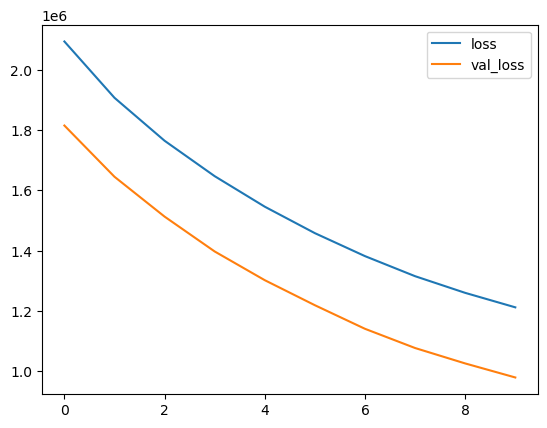

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

In [41]:
model.evaluate(X_test_prepd,y_test,batch_size=1024) # loss i mape na zbiorze testowym

16/16 [==============================] - 0s 7ms/step - loss: 1003625.2500 - mape: 21.3735


[1003625.25, 21.37347412109375]

In [42]:
y_test_pred=model.predict(X_test_prepd, batch_size=1024)

16/16 [==============================] - 0s 3ms/step


In [43]:
y_test_pred

array([[  577.80743],
       [ 3017.5151 ],
       [ 1369.0596 ],
       ...,
       [10919.528  ],
       [ 4317.214  ],
       [ 1452.9235 ]], dtype=float32)

In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_test_pred, squared=False)

1001.8109406064901

In [45]:
df['price'].max()

18823

### Callbacks
* A callback allows to customize and extend model behavior during training 
* Keras allows you to write your own custom callback 
* There are several predefined callbacks located in tf.keras.callbacks that include:
    * ModelCheckpoint: save checkpoints of your model at regular intervals
    * LearningRateScheduler: Dynamically change the learning rate
    * EarlyStopping: Interrupt training when validation performance has stopped improving
    * TensorBoard: Monitor the model's behavior using TensorBoard

`
callbacks = [
  tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
  ]
model.fit(data, labels, batch_size=32, epochs=5, callbacks=callbacks,
          validation_data=(val_data, val_labels))
`


In [46]:
def model_init():
    input_layer = layers.Input(shape = (X_train_prepd.shape[1],),name = "input")

    h1 = layers.Dense(64,activation = "relu", name = "h1")(input_layer)
    h2 = layers.Dense(32,activation = "relu", name = "h2")(h1)
    h3 = layers.Dense(16,activation = "relu", name = "h3")(h2)


    output_layer = layers.Dense(1,activation = "relu", name = "out")(h3)

    model = keras.Model(input_layer, output_layer)
    model.compile(loss = "mse", optimizer = "adam", metrics = ["mape"])
    return model

In [47]:
import datetime
logs_path = "logs\\"+datetime.datetime.now().strftime("%H-%M-%S")

cb = [
    keras.callbacks.EarlyStopping(patience=30,restore_best_weights=True),
    keras.callbacks.TensorBoard(log_dir= logs_path)
]

model = model_init()

history = model.fit(X_train_prepd,
          y_train,
         batch_size=1024,
          epochs=1000,
          validation_split=.2,
                   callbacks=cb,
                   verbose = 0)

In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_test_pred,squared=False)# RMSE

1001.8109406064901

In [49]:
y_train_pred = model.predict(X_train_prepd,batch_size =1024)
mean_squared_error(y_train,y_train_pred,squared=False)# RMSE

37/37 [==============================] - 0s 3ms/step


511.9200628887349

### TensorBoard


In [50]:
%pwd

'C:\\Users\\paperspace\\Desktop\\training\\Training materials I\\2. Budowa sieci MLP w Tensorflow Keras API'

in terminal:
tensorboard --logdir "C:\Users\paperspace\Desktop\training\Training materials I\2. Budowa sieci MLP w Tensorflow Keras API\logs"

### Saving and restoring model
* by default tensorflow save data in TensorFlow checkpoint file format
* to save in  Keras HDF5 format use .h5 extension

Keras allows for different behaviour on save :
* the weights values - tf.keras.Model.save_weights, 

`
model.save_weights('./weights/my_model')
model.load_weights('./weights/my_model') # the same model architecture`

`
model.save_weights('my_model.h5', save_format='h5')
model.load_weights('my_model.h5')
`

* the model configuration - serializes the model architecture without any weights, supported formats are JSON and YAML:

`
json_string = model.to_json()
json_string
`

`
import json
import pprint
pprint.pprint(json.loads(json_string))
`

`
new_model = tf.keras.models.model_from_json(json_string) # recreate model
`

`
yaml_string = model.to_yaml()
print(yaml_string)
`

`
new_model = tf.keras.models.model_from_yaml(yaml_string) # recreate from yaml
`

* entire model in one file - the weight values, the model's configuration, and the optimizer's configuration, allows to checkpoint a model and resume training later—from the exact same state—without access to the original code

`
model.save('my_model.h5')
`

`
model = tf.keras.models.load_model('my_model.h5')
`


In [51]:
model.save('model_diamonds.h5')

In [52]:
model=keras.models.load_model('model_diamonds.h5')

-------


### MLP for Classification problem
When our target variable $y$ is discrete(categorical) we have classification problem.
In the case of classification we need to set appropriate loss function and evaluation metric. The most commonly used metric is accuracy, although it has some problems.

MLP Architecture for classification problem:
* Number of neurons in input layer equal to number of predictors
* Number of neurons in output layer equal to number of levels of categorical variables
* Activation function depends on number of levels in target variable - sigmoid for binary problems or softmax for more more levels.
* Loss function - binary_crossentropy or categorical_crossentropy 


### Problem description
#### Identify fraudulent credit card transactions

* credit cards transactions collected over two days of September 2013 in Europe
* 492 frauds out of 284,807 transactions -highly imbalanced problem 

#### Data
* Columns  V1, V2, … V28 obtained as a result of PCA transformation represent features - transformed due to confidentiality issues 
* 'Time' and 'Amount' only variables in original form
* 'Time' measures the seconds elapsed between each transaction and the first transaction in the dataset
* 'Amount' can be used for cost-sensitive learning
* Class is our target encoded as follows: 
    * 1 - fraud
    * 0 - otherwise

#### File
* "data/creditcard.csv"

#### Data Import

In [53]:
df=pd.read_csv("../../../data/data/creditcard.csv")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [55]:
df.Class.value_counts()/df.shape[0] #%

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [56]:
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


#### 0. Data Preprocessing

In [57]:
X=df.drop(columns=['Class'])
y=df.Class

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=42, stratify=y)
#stratify zapewnie podzial klasy y - inbalanced dataset

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142403, 30), (142404, 30), (142403,), (142404,))

In [59]:
# %load "g:/My Drive/diamonds_preproc.py"
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. select labels of features for one hot encoding and standarization
num_labels = X_train.select_dtypes("number").columns

# 2. define preprocessor for each type of data
num_preprocessor = RobustScaler()

# 3. Combine it all together
preprocessor = ColumnTransformer([
                                 ("num", num_preprocessor, num_labels)])


In [60]:
preprocessor

ColumnTransformer(transformers=[('num', RobustScaler(),
                                 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object'))])

In [61]:
preprocessor.fit(X_train) #tylo train - data leakage
feature_labels=preprocessor.transformers_[0][1].get_feature_names_out().tolist() 
# aby dostac sie do nazw kolumn jakosciowych po transformacji

In [62]:
feature_labels

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [63]:
X_train_prepd=preprocessor.transform(X_train)
X_train_prepd=pd.DataFrame(X_train_prepd, columns=feature_labels)

X_test_prepd=preprocessor.transform(X_test)
X_test_prepd=pd.DataFrame(X_test_prepd, columns=feature_labels)

#### 1. Creating a model

In [64]:
y_train.value_counts()

0    142157
1       246
Name: Class, dtype: int64

In [65]:
def model_init():
    input_layer=layers.Input(shape=(X_train_prepd.shape[1],), name='input')

    h1=layers.Dense(64,activation='relu', name='h1')(input_layer)
    h2=layers.Dense(64,activation='relu', name='h2')(h1)
    h3=layers.Dense(64,activation='relu', name='h3')(h2)

    output_layer=layers.Dense(1,activation='sigmoid', name='out')(h3)


    model=keras.Model(input_layer,output_layer)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [66]:
import datetime
logs_path = "logs\\"+datetime.datetime.now().strftime("%H-%M-%S")

cb = [
    keras.callbacks.EarlyStopping(patience=30,restore_best_weights=True),
    keras.callbacks.TensorBoard(log_dir= logs_path)
]

model = model_init()

history = model.fit(X_train_prepd,
          y_train,
         batch_size=1024,
          epochs=1000,
          validation_split=.2,
                   callbacks=cb,
                   verbose = 0)

#### 2. Adding layers

#### 3. Model Compilation
*

#### 3.1 Model as function

#### 4. Model Summary

In [67]:
model=model_init()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 30)]              0         
                                                                 
 h1 (Dense)                  (None, 64)                1984      
                                                                 
 h2 (Dense)                  (None, 64)                4160      
                                                                 
 h3 (Dense)                  (None, 64)                4160      
                                                                 
 out (Dense)                 (None, 1)                 65        
                                                                 
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_________________________________________________________________


#### 5. Model training and monitoring


#### 6. Evaluation
Doc (metrics): https://keras.io/metrics/


In [68]:
model.evaluate(X_test_prepd,y_test, batch_size=1024)

140/140 [==============================] - 1s 6ms/step - loss: 0.8285 - accuracy: 0.2756


[0.8284557461738586, 0.275631308555603]

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [70]:
y_test_prob=model.predict(X_test_prepd)

4451/4451 [==============================] - 10s 2ms/step


In [71]:
cutoff=.5
y_test_pred=np.where(y_test_prob>=cutoff ,1,0 )

In [72]:
accuracy_score(y_test,y_test_pred)

0.275631302491503

In [73]:
confusion_matrix(y_test,y_test_pred)

array([[ 39018, 103140],
       [    13,    233]], dtype=int64)

In [74]:
y_test.value_counts()/y_test.shape

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [75]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.27      0.43    142158
           1       0.00      0.95      0.00       246

    accuracy                           0.28    142404
   macro avg       0.50      0.61      0.22    142404
weighted avg       1.00      0.28      0.43    142404



In [76]:
# %load "g:/My Drive/roc_prc.py"
def plot_roc(y_test, prob, model_name = ""):
    
    from sklearn.metrics import roc_curve, roc_auc_score
    import matplotlib.pyplot as plt
    
    fpr, recall, tresh = roc_curve(y_test, prob)
    auc = roc_auc_score(y_test, prob)
    
    plt.plot(fpr, recall, label = "{} AUC = {}".format(model_name, auc.round(2)))
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel("FPR")
    plt.ylabel("Recall")
    plt.title("ROC Curve")
    plt.legend()
    
def plot_prc(y_test, prob, model_name = ""):
    
    from sklearn.metrics import precision_recall_curve, average_precision_score
    import matplotlib.pyplot as plt
    
    precision, recall, tresh = precision_recall_curve(y_test, prob)
    auc = average_precision_score(y_test, prob)
    
    plt.plot(precision, recall, label = "{} AUPRC = {}".format(model_name, auc.round(2)))
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.title("Precision-Recall Curve")
    plt.legend()

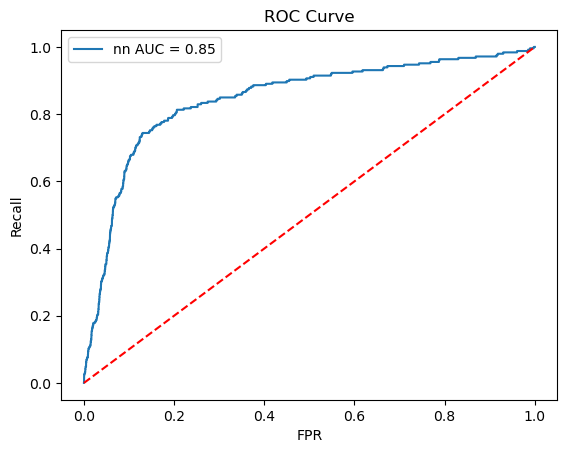

In [77]:
plot_roc(y_test,y_test_prob,'nn')

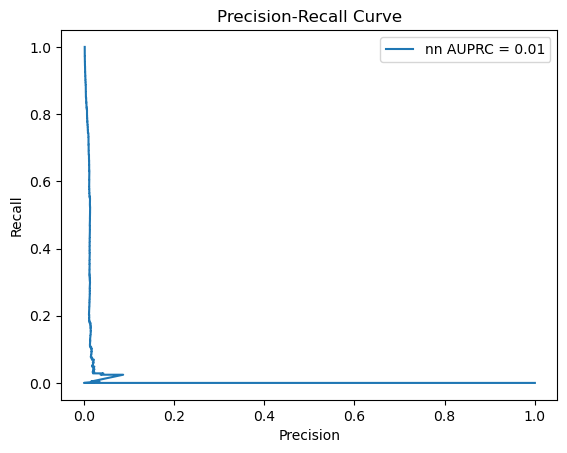

In [78]:
plot_prc(y_test,y_test_prob,'nn')

### modyfikacja zgodnie z najlepszycm podejsciem w kontekscie niezbbilansowania

In [79]:
neg, pos=np.bincount(y_train)
neg
pos
total=neg+pos

initial_bias=np.log(pos/neg) # niezbilansowany problem wiec trzeba z biasem kombinowac, i dodac do warstwy output
initial_bias=keras.initializers.Constant(initial_bias)
initial_bias

In [80]:
metrics_to_monitor=[
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(curve='PR', name='prc')
]

In [81]:
def model_init():
    input_layer=layers.Input(shape=(X_train_prepd.shape[1],), name='input')

    h1=layers.Dense(64,activation='relu', name='h1')(input_layer)
    h2=layers.Dense(64,activation='relu', name='h2')(h1)
    h3=layers.Dense(64,activation='relu', name='h3')(h2)

    output_layer=layers.Dense(1,activation='sigmoid', name='out', bias_initializer=initial_bias)(h3)


    model=keras.Model(input_layer,output_layer)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics_to_monitor)
    
    return model

In [82]:
from sklearn.utils.class_weight import compute_class_weight
wagi=compute_class_weight('balanced', classes=y_train.unique(), y=y_train)

In [83]:
import datetime
logs_path = "logs\\"+datetime.datetime.now().strftime("%H-%M-%S")

#cb = [
#    keras.callbacks.EarlyStopping(monitor='val_prc',mode='max',patience=30,restore_best_weights=True),
#    keras.callbacks.TensorBoard(log_dir= logs_path)
#]

model = model_init()

history = model.fit(X_train_prepd,
          y_train,
         batch_size=1024,
          epochs=100,
          validation_split=.2,
                   callbacks=cb,
                   verbose = 1,
                   class_weight={0: wagi[0],
                                1: wagi[1]})

Epoch 1/100
112/112 [==============================] - 3s 18ms/step - loss: 0.6198 - auc: 0.9152 - prc: 0.0883 - val_loss: 0.1329 - val_auc: 0.9871 - val_prc: 0.1801
Epoch 2/100
112/112 [==============================] - 2s 15ms/step - loss: 0.2050 - auc: 0.9805 - prc: 0.1848 - val_loss: 0.1725 - val_auc: 0.9892 - val_prc: 0.1724
Epoch 3/100
112/112 [==============================] - 2s 15ms/step - loss: 0.1542 - auc: 0.9887 - prc: 0.2988 - val_loss: 0.2042 - val_auc: 0.9846 - val_prc: 0.1730
Epoch 4/100
112/112 [==============================] - 2s 15ms/step - loss: 0.1152 - auc: 0.9926 - prc: 0.3787 - val_loss: 0.0923 - val_auc: 0.9748 - val_prc: 0.4596
Epoch 5/100
112/112 [==============================] - 1s 13ms/step - loss: 0.1277 - auc: 0.9891 - prc: 0.2985 - val_loss: 0.1335 - val_auc: 0.9789 - val_prc: 0.2356
Epoch 6/100
112/112 [==============================] - 2s 14ms/step - loss: 0.0921 - auc: 0.9953 - prc: 0.3970 - val_loss: 0.1446 - val_auc: 0.9731 - val_prc: 0.2701
Epoc

112/112 [==============================] - 2s 15ms/step - loss: 0.0024 - auc: 0.9999 - prc: 0.8898 - val_loss: 0.0125 - val_auc: 0.9341 - val_prc: 0.6813
Epoch 51/100
112/112 [==============================] - 2s 15ms/step - loss: 0.0022 - auc: 0.9999 - prc: 0.8902 - val_loss: 0.0116 - val_auc: 0.9342 - val_prc: 0.6869
Epoch 52/100
112/112 [==============================] - 2s 15ms/step - loss: 0.0021 - auc: 0.9999 - prc: 0.9076 - val_loss: 0.0138 - val_auc: 0.9341 - val_prc: 0.6812
Epoch 53/100
112/112 [==============================] - 2s 15ms/step - loss: 0.0028 - auc: 0.9999 - prc: 0.8675 - val_loss: 0.0160 - val_auc: 0.9336 - val_prc: 0.6224
Epoch 54/100
112/112 [==============================] - 2s 15ms/step - loss: 0.0031 - auc: 0.9998 - prc: 0.8555 - val_loss: 0.0136 - val_auc: 0.9232 - val_prc: 0.6899
Epoch 55/100
112/112 [==============================] - 2s 15ms/step - loss: 0.0031 - auc: 0.9998 - prc: 0.8497 - val_loss: 0.0132 - val_auc: 0.9340 - val_prc: 0.6910
Epoch 56/10

112/112 [==============================] - 2s 15ms/step - loss: 0.0011 - auc: 1.0000 - prc: 0.9601 - val_loss: 0.0101 - val_auc: 0.9343 - val_prc: 0.7550
Epoch 100/100
112/112 [==============================] - 2s 15ms/step - loss: 0.0012 - auc: 1.0000 - prc: 0.9550 - val_loss: 0.0110 - val_auc: 0.9235 - val_prc: 0.7160


## Advanced techniques related to training neural networks
* Weight initialization
* Activation functions
* Optimizers
* Batch normalization
* Dropout(regularization)

In [84]:
y_test_prob=model.predict

### Weight Initialization
Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

* tf.keras.initializers module offers built-in initializers such as:
    * RandomNormal - generates tensors with a normal distribution
    * RandomUniform - generates tensors with a uniform distribution
    * TruncatedNormal - generates tensors like RandomNormal but values more than two standard deviations from the mean are discarded and re-drawn 
    * Zeros - generates tensors initialized to 0
    * Ones - generates tensors initialized to 1
    * GlorotNormal - generate tensors from truncated normal distribution centered on 0 with $$stddev = \sqrt{\frac{2}{fan_{in} + fan_{out}}}$$ where $fan_{in}$ is the number of input units in the weight tensor and $fan_{out}$ is the number of output units in the weight tensor. http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
    * GlorotUniform - generates tensors from a uniform distribution within $[-cap, cap]$, where $$cap = \sqrt{\frac{6}{fan_{in} + fan_{out}}}$$
    * VarianceScaling - generate tensors with scale adjusted  to the shape of weights tensor
    

More initializers: https://keras.io/initializers/

In [90]:
from tensorflow.keras.initializers import RandomNormal, RandomUniform,TruncatedNormal,Ones,GlorotNormal,GlorotUniform,VarianceScaling
n=10000

classes = [RandomNormal, RandomUniform,TruncatedNormal,GlorotNormal,GlorotUniform, VarianceScaling]  # list of functions
output=np.empty(shape=(n,len(classes)))

for idx,fn in enumerate(classes):
    initializer=fn(seed=42)
    output[:,idx] = np.ravel(initializer(shape=(n,1)))
       

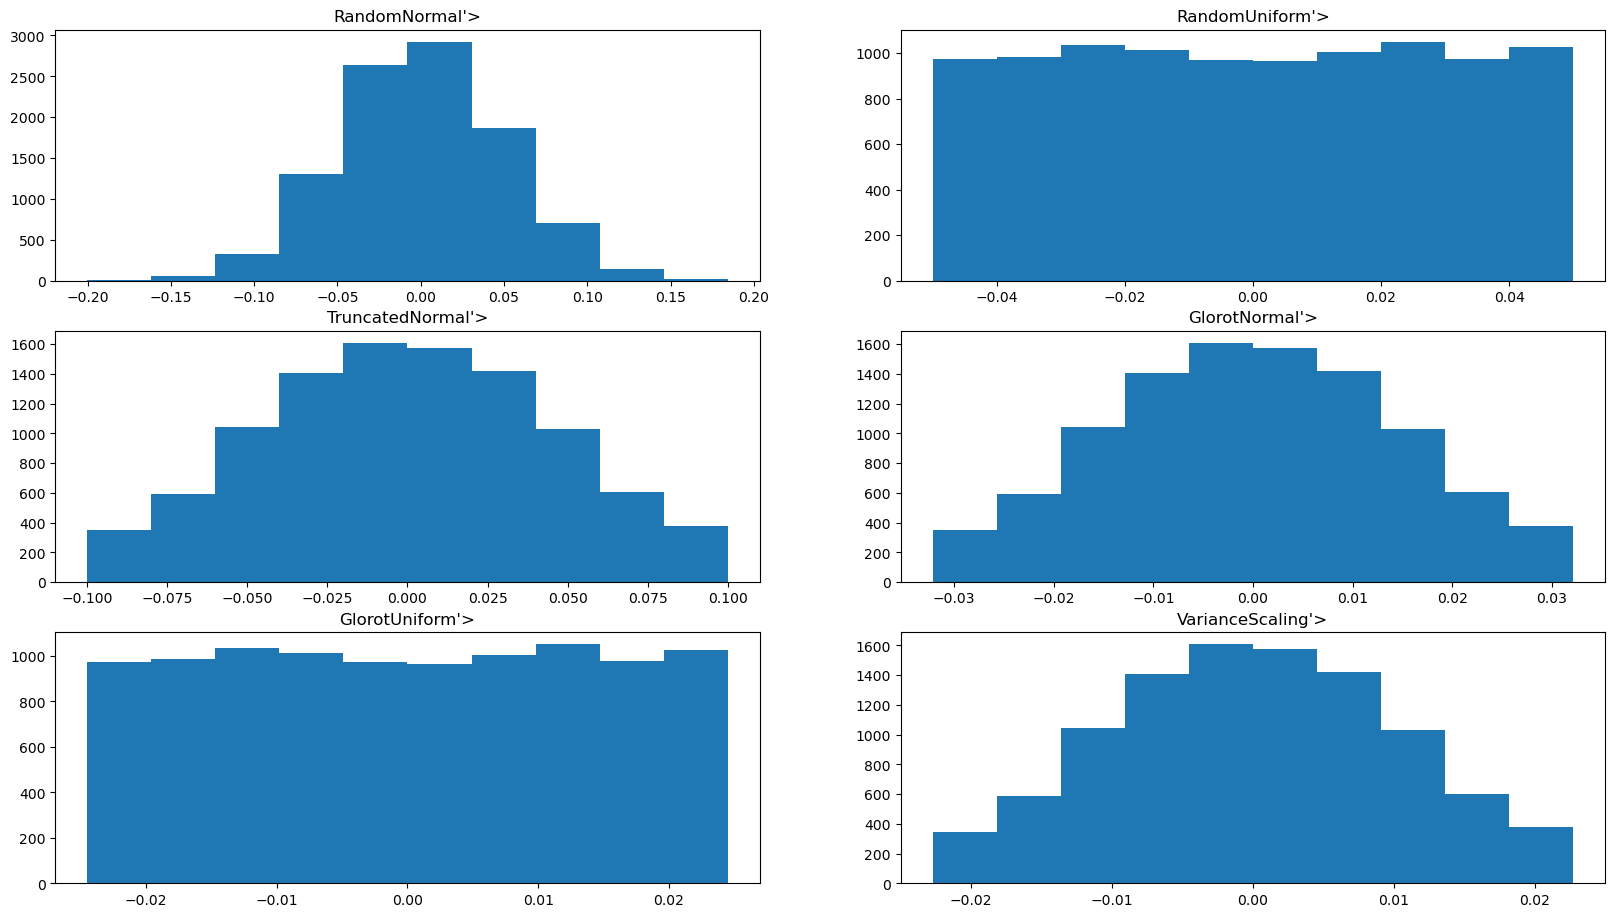

In [91]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,15


for i in range(0, 6):
    plt.subplot(4, 2, i+1).set_title(str(classes[i]).split(".")[-1])
    plt.hist(output[:,i])



#### Test Weight tensors initializer

-----

### Activation Functions
Sigmoid functions suffer from gradient vanishing problem, making training slower

There are many choices apart from sigmoid and tanh; 
* 'relu' (rectified linear unit) 
* 'selu' (scaled exponential linear unit)
* 'elu' 
* 'exponential' 
* 'sigmoid' 
* 'softmax' 
* 'softplus' 
* 'tanh' 

https://keras.io/api/layers/activations/

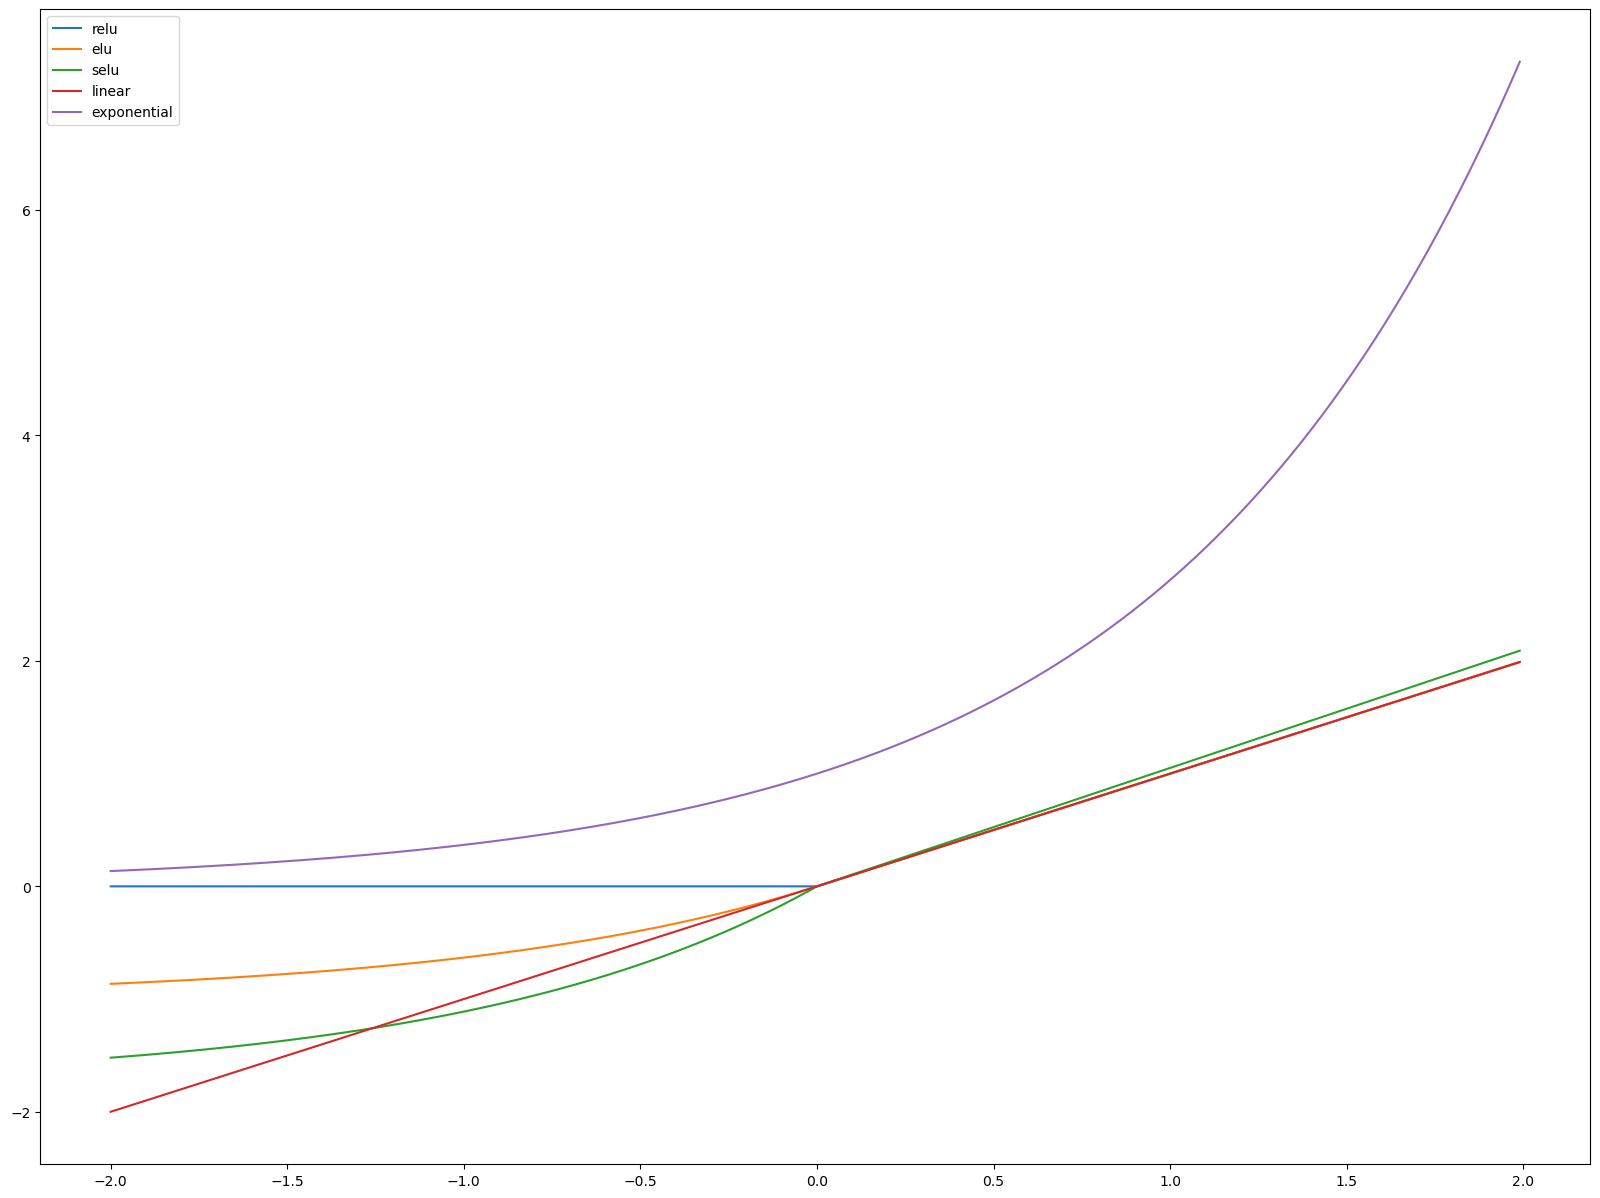

In [87]:
from tensorflow.keras.activations import relu,elu,selu,sigmoid,tanh, linear, exponential, softmax
wartosci = np.arange(-2, 2, 0.01)
classes = [relu,elu,selu, linear,exponential]  # list of functions
output=np.empty(shape=(len(wartosci),len(classes)))

for idx,fn in enumerate(classes):
    output[:,idx]=np.ravel(fn(wartosci))

from pylab import rcParams
rcParams['figure.figsize'] = 20,15

legenda= [str(i).split(" ")[1] for i in classes]
plt.plot(wartosci,output)
plt.legend(legenda)


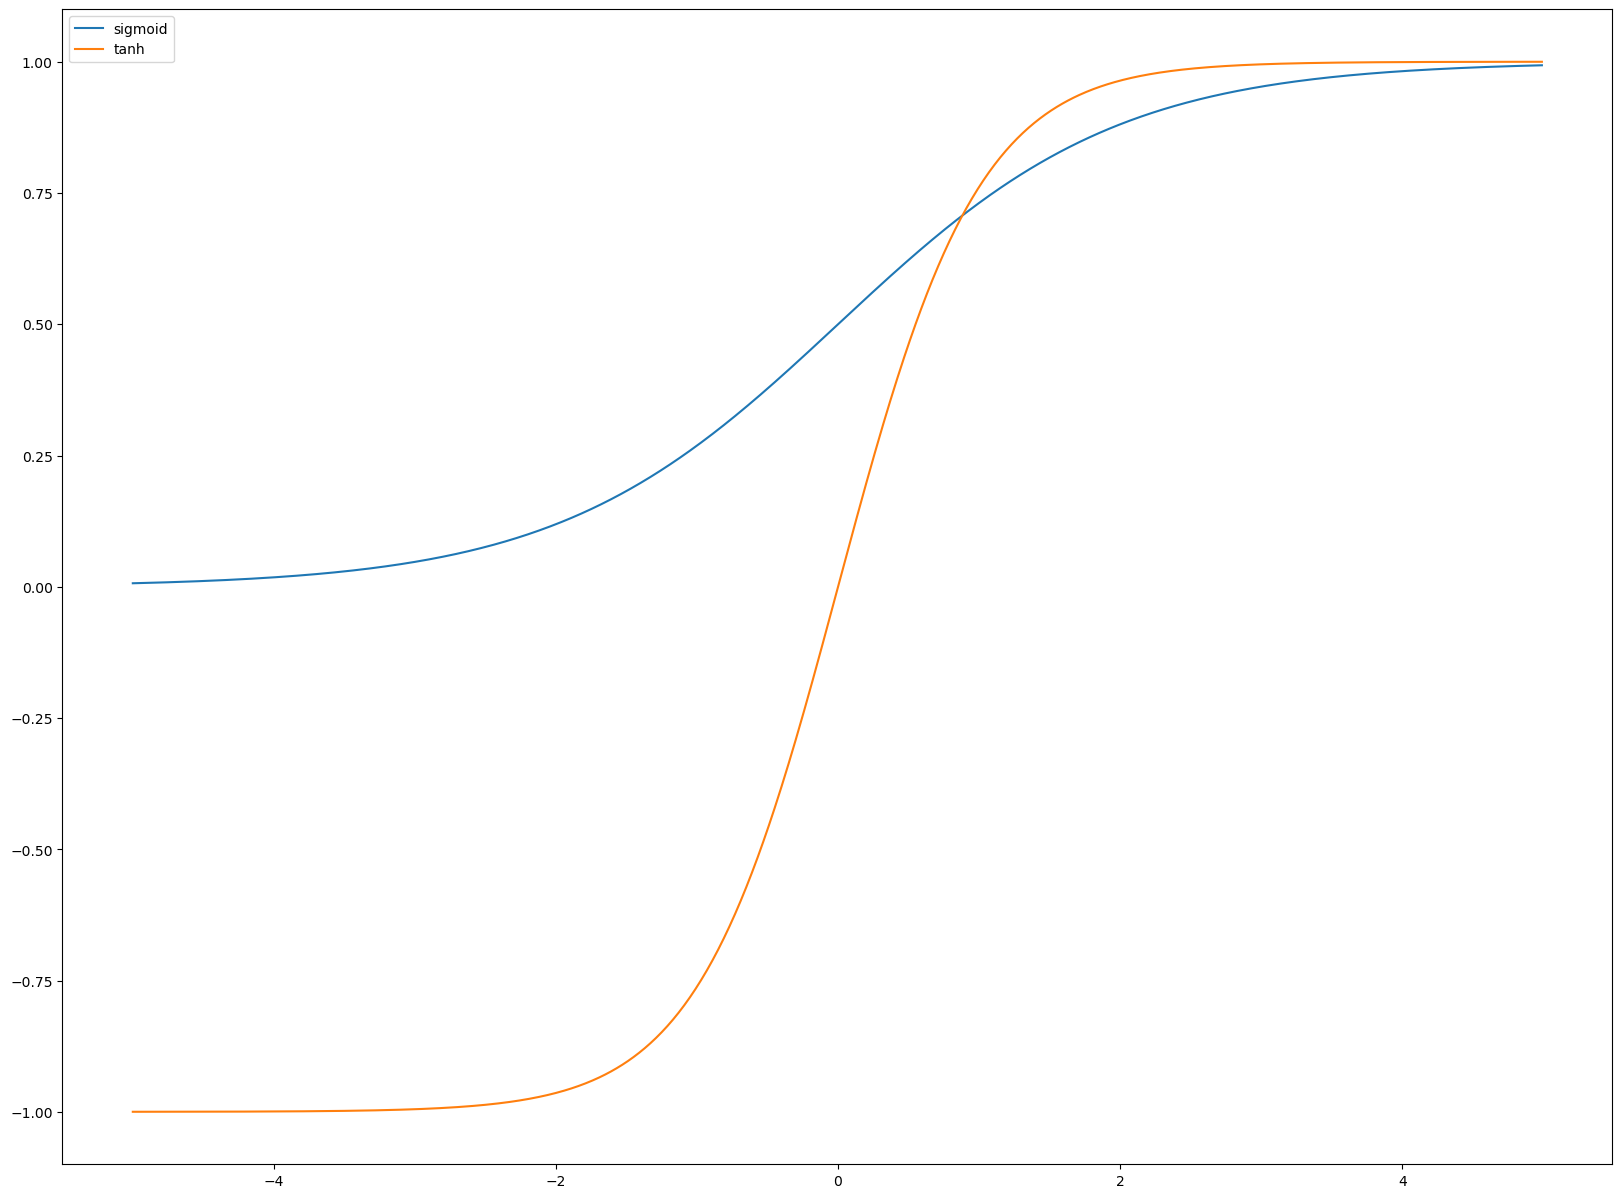

In [88]:
from tensorflow.keras.activations import relu,elu,selu,sigmoid,tanh, linear, exponential, softmax
wartosci = np.arange(-5, 5, 0.01)
classes = [sigmoid, tanh]  # list of functions
output=np.empty(shape=(len(wartosci),len(classes)))

for idx,fn in enumerate(classes):
    output[:,idx]=np.ravel(fn(wartosci))

from pylab import rcParams
rcParams['figure.figsize'] = 20,15

legenda= [str(i).split(" ")[1] for i in classes]
plt.plot(wartosci,output)
plt.legend(legenda)

#### Test activation functions

### Optimizers

Many variants of SGD are available and employed in training
One of the most popular ones are Adam (Adaptive Moment Estimation)
Doc: https://keras.io/optimizers/

![Source](graphics/optimizers.gif)


In [89]:
from tensorflow.keras.optimizers import Adadelta,Adagrad,Adam,RMSprop,SGD


### Batch Normalization
Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity


### Dropout 
Dropout is one of powerful ways to prevent overfitting. The idea is simple. It is disconnecting some (randomly selected) neurons in each layer.

The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated

Doc: https://keras.io/layers/core/#dropout

![Source](graphics/dropout.png)
